# Movies and TV Shows Insights

## Introduction

This notebook will performs an exploratory data analysis (EDA) on the Netflix dataset. The goal is to uncover insights into the Netflix's library, like:
- How the distribution of content types (Movies vs. TV Shows) has evolved over time.
- Which genres and coutries dominate the library.
- Trends in durations, ratings and prolific directors.

By analyzing and visualizing the trends, we can have better understanding of the Netflix's library.

#### Notebook Outline
1. **Data Loading & Overview**
    - Loading the dataset, and quick overview of what is inside, shape, information, and describe.
2. **Data Cleaning**
    - Handling missing values, duplicates, and inconsistent formatting.
3. **Feature Engineering**
    - Adding new columns, new calculations, and breakdown difficult rows into multiple for better analysis process.
4. **Visualization / EDA**
    - Distribution of content types, genres, durations, and more.
5. **Key Insights**
    - Summary of interesting findings from the analysis.
6. **Acknowledgment**
    - Acknowledges where the dataset came from.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading & Overview

In [3]:
df = pd.read_csv("../data/raw/netflix_titles.csv", encoding="unicode_escape")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
rows, columns = df.shape
print('Table rows is: ', rows)
print('Table columns is: ', columns)

Table rows is:  8807
Table columns is:  12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df['director'] = df['director'].apply(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

In [9]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('NR')

In [10]:
df = df.dropna(subset=['duration'])

In [11]:
df['date_added'] = df['date_added'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['duration'] = df['duration'].str.strip()
df['country'] = df['country'].str.strip(' ,')

In [12]:
df['date_added'] = df.apply(lambda x: pd.Timestamp(f"{x['release_year']}-01-01") if pd.isna(x['date_added']) else x['date_added'], axis=1)

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      8804 non-null   object        
 4   cast          8804 non-null   object        
 5   country       8804 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8804 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.2+ KB


In [2]:
df.to_csv('../data/processed/netflix_cleaned.csv')

NameError: name 'df' is not defined

## Feature Engineering

In [15]:
df_date_expand = df.copy()

In [16]:
df_date_expand ['year_added'] = df_date_expand ['date_added'].dt.year.astype('Int64')
df_date_expand ['month_added'] = df_date_expand ['date_added'].dt.month_name().astype('object')
df_date_expand ['day_added'] = df_date_expand ['date_added'].dt.day.astype('Int64')

In [17]:
df_genre_explode = df.copy()

In [18]:
df_genre_explode['genre_list'] = df_genre_explode['listed_in'].str.split(',')
df_genre_explode = df_genre_explode.explode('genre_list')

In [19]:
df_genre_explode['genre_list'] = df_genre_explode['genre_list'].str.replace(r'^(TV |Movie[s]? )|(\s+TV Shows|\s+Movies)$', '', regex=True).str.strip()

In [20]:
df_genre_explode['genre_list'] = df_genre_explode['genre_list'].str.replace(r'^TV\s+', '', regex=True).str.strip()

In [21]:
df_country_explode = df.copy()

In [22]:
df_country_explode['countries'] = df_country_explode['country'].str.split(',')
df_country_explode = df_country_explode.explode('countries')

In [23]:
df_country_explode['countries'] = df_country_explode['countries'].str.strip()

## Exploratory Data Analysis (EDA)

In [24]:
type_palette = {'Movie': 'darkblue', 'TV Show': 'lightblue'}

### Content Type Analysis

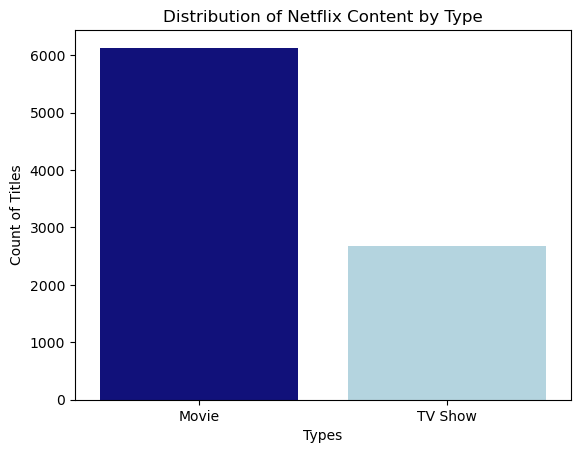

In [25]:
sns.countplot(data=df, x='type', hue='type', palette=type_palette)
plt.ylabel('Count of Titles')
plt.xlabel('Types')
plt.title('Distribution of Netflix Content by Type')
plt.show()

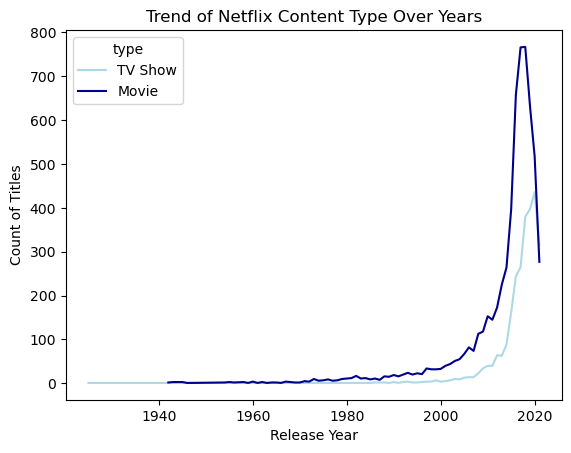

In [26]:
yearly_type_counts = df.groupby(['release_year', 'type'])['title'].count().reset_index()

sns.lineplot(data=yearly_type_counts, x='release_year', y='title', hue='type', palette=type_palette)
plt.xlabel('Release Year')
plt.ylabel('Count of Titles')
plt.title('Trend of Netflix Content Type Over Years')
plt.show()

### Yearly Trends

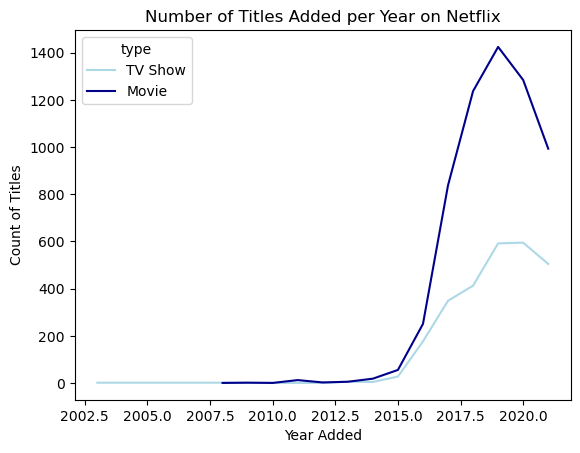

In [27]:
yearly_trends = df_date_expand.groupby(['year_added', 'type'])['title'].count().reset_index()

sns.lineplot(data=yearly_trends, x='year_added', y='title', hue='type', palette=type_palette)
plt.xlabel('Year Added')
plt.ylabel('Count of Titles')
plt.title('Number of Titles Added per Year on Netflix')
plt.show()

### Genre/Category Analysis

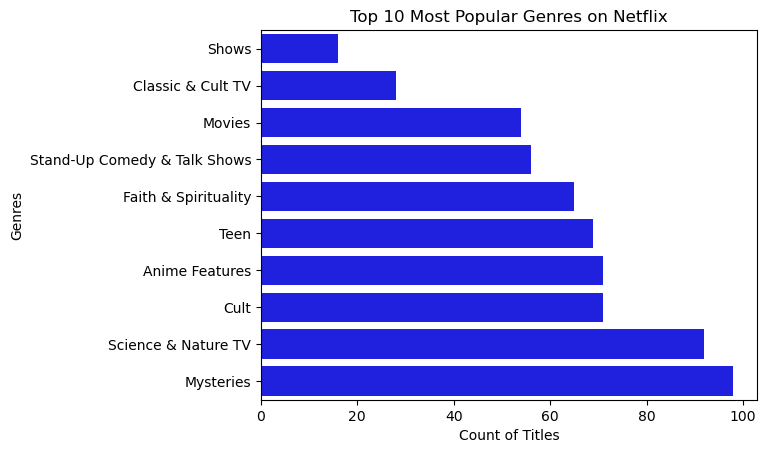

In [28]:
ten_most_pop_genre = df_genre_explode.groupby('genre_list')['title'].count().reset_index().sort_values(by='title', ascending=True)[:10]

sns.barplot(data=ten_most_pop_genre, x='title', y='genre_list', color='blue')
plt.xlabel('Count of Titles')
plt.ylabel('Genres')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.show()

In [29]:
genre_by_type = df_genre_explode.groupby(['genre_list', 'type'])['title'].count().reset_index()
genre_by_type_expanded = genre_by_type.pivot(index='genre_list', columns='type', values='title')
genre_by_type_expanded = genre_by_type_expanded[['TV Show', 'Movie']]
genre_by_type_expanded = genre_by_type_expanded.fillna(0)
genre_by_type_expanded = genre_by_type_expanded.assign(total = genre_by_type_expanded['TV Show'] + genre_by_type_expanded['Movie']).sort_values(by='total', ascending=False)
genre_by_type_expanded = genre_by_type_expanded.drop(columns='total')

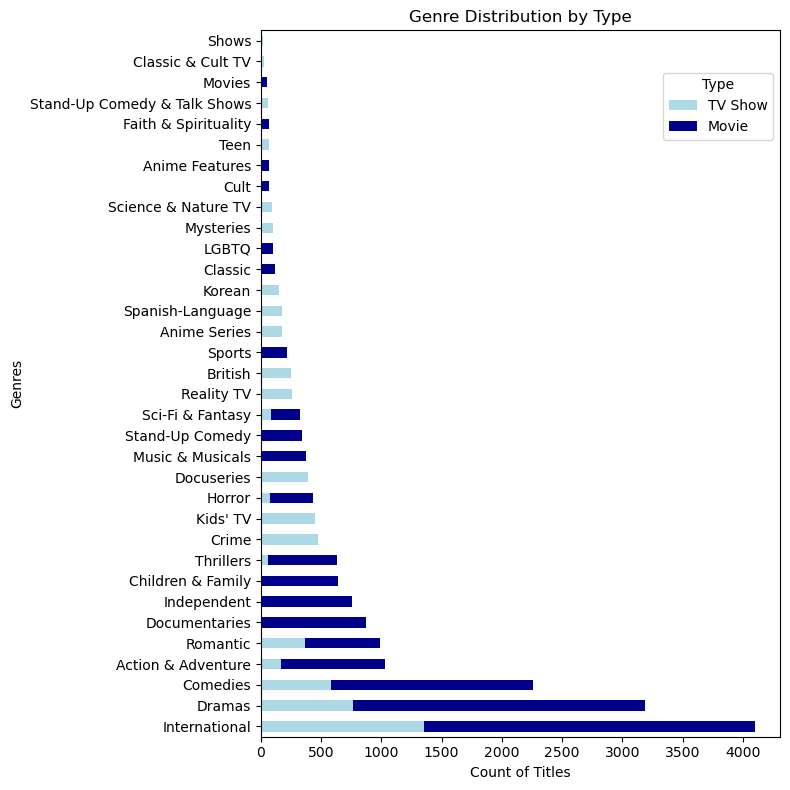

In [30]:
genre_by_type_expanded.plot(kind='barh', stacked=True, color=type_palette, figsize=(8,8))
plt.xlabel('Count of Titles')
plt.ylabel('Genres')
plt.title('Genre Distribution by Type')
plt.legend(title='Type', loc='upper right', bbox_to_anchor=(1, .95))
plt.tight_layout()
plt.show()

### Country Analysis

In [31]:
top_countries = df_country_explode.groupby('countries')['title'].count().reset_index().sort_values(by='title', ascending=False)[:11]
top_countries = top_countries.drop(top_countries.index[3])

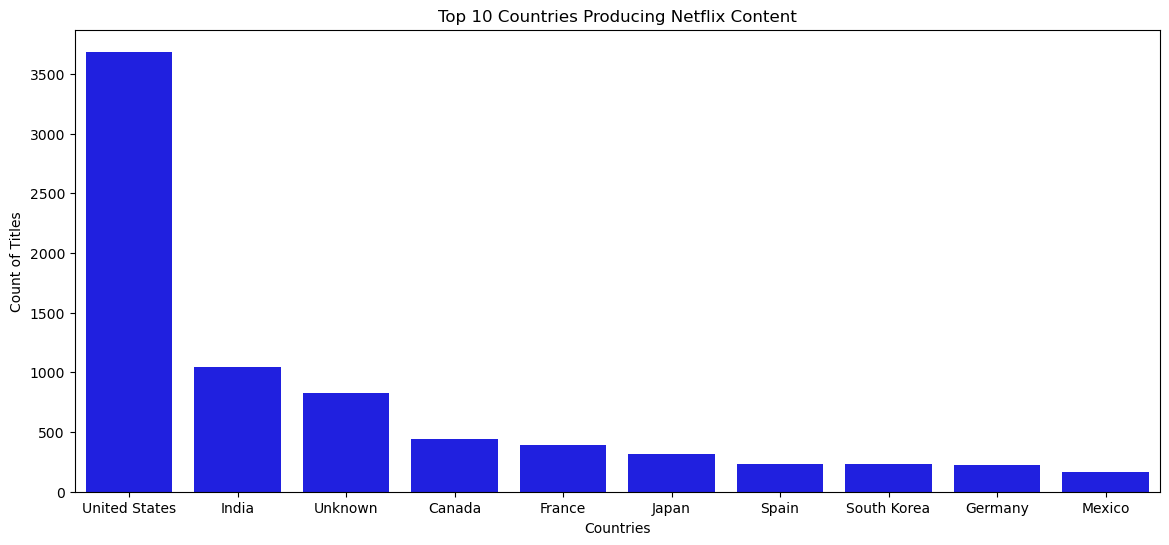

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(data=top_countries, x='countries', y='title', color='blue')
plt.xlabel('Countries')
plt.ylabel('Count of Titles')
plt.title('Top 10 Countries Producing Netflix Content')
plt.show()

### Rating Analysis

In [73]:
grouped_rating = df.groupby(['rating', 'type'])['title'].count().reset_index()
grouped_rating = grouped_rating.pivot(index='rating', columns='type', values='title')
grouped_rating = grouped_rating[['TV Show', 'Movie']].sort_values(by='Movie', ascending=False)
grouped_rating['TV Show'] = grouped_rating['TV Show'].fillna(0)

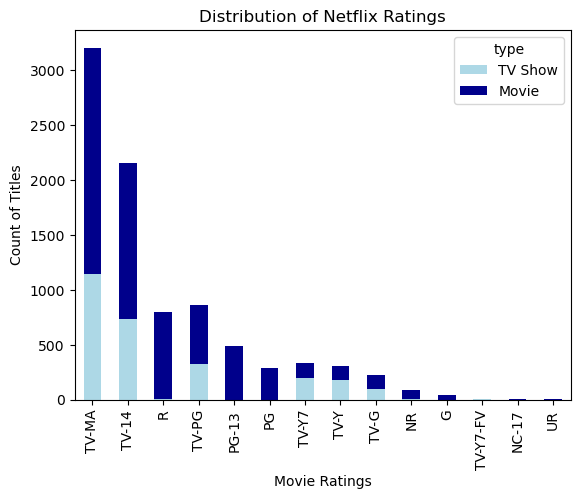

In [74]:
grouped_rating.plot(kind='bar', stacked=True, color=type_palette)
plt.xlabel('Movie Ratings')
plt.ylabel('Count of Titles')
plt.title('Distribution of Netflix Ratings')
plt.show()

### Duration Analysis

In [34]:
df_movies = df_genre_explode[df_genre_explode['type'] == 'Movie'].copy()
df_movies['duration'] = df_movies['duration'].str.replace(r'\D+', '', regex=True).str.strip().astype('Int64')

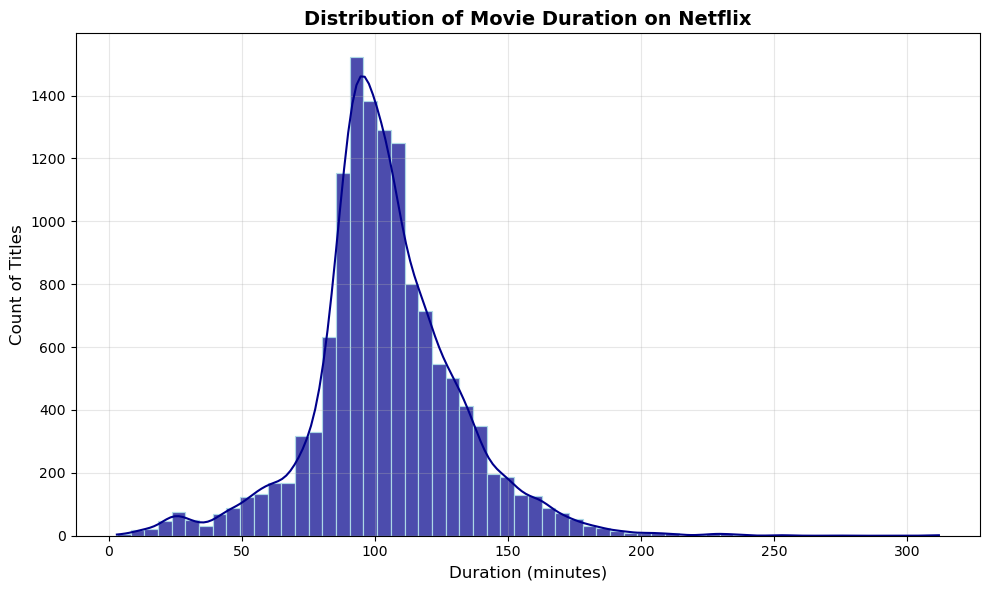

In [35]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_movies, x='duration', bins=60, kde=True, color='darkblue', edgecolor='lightblue', alpha=0.7)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Count of Titles', fontsize=12)
plt.title('Distribution of Movie Duration on Netflix', fontsize=14, weight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [36]:
movie_genre_duration = df_movies.groupby(['duration', 'genre_list'])['title'].count().reset_index().sort_values(['genre_list', 'title'], ascending=[True, False])
most_popular_duration_movie = movie_genre_duration.groupby('genre_list').head(1).sort_values(by='title', ascending=True)

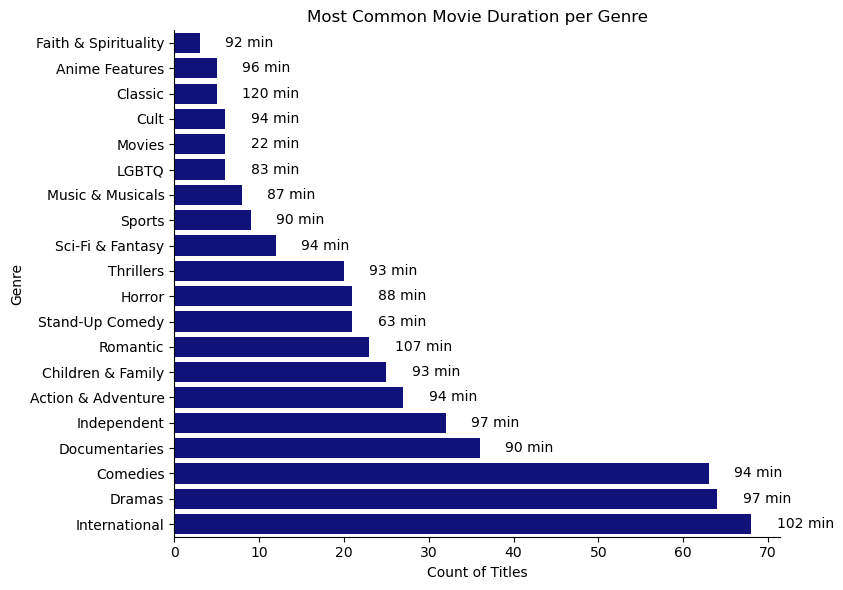

In [37]:
plt.figure(figsize=(8,6))

sns.barplot(data=most_popular_duration_movie, x='title', y='genre_list', color='darkblue')
plt.title('Most Common Movie Duration per Genre')
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
plt.tight_layout()
sns.despine()

for index, value in enumerate(most_popular_duration_movie['title']):
    plt.text(value + 3, index, str(int(most_popular_duration_movie['duration'].iloc[index])) + ' min', va='center')
    
plt.show()

In [38]:
df_shows = df_genre_explode[df_genre_explode['type'] == 'TV Show'].copy()
df_shows['duration'] = df_shows['duration'].str.replace(r'\D+', '', regex=True).str.strip().astype('Int64')
df_shows['duration'].info()

<class 'pandas.core.series.Series'>
Index: 6133 entries, 1 to 8803
Series name: duration
Non-Null Count  Dtype
--------------  -----
6133 non-null   Int64
dtypes: Int64(1)
memory usage: 101.8 KB


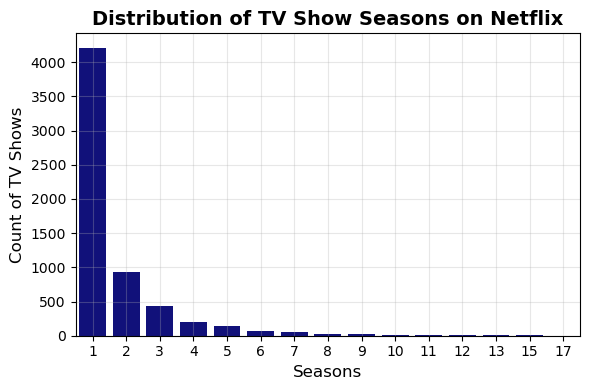

In [39]:
plt.figure(figsize=(6, 4))

sns.countplot(data=df_shows, x='duration', color='darkblue')
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Count of TV Shows', fontsize=12)
plt.title('Distribution of TV Show Seasons on Netflix', fontsize=14, weight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [40]:
show_duration_genre = df_shows.groupby(['duration', 'genre_list'])['title'].count().reset_index()
most_popular_duration_show = show_duration_genre.groupby('genre_list').head(1).sort_values(by='title', ascending=True)

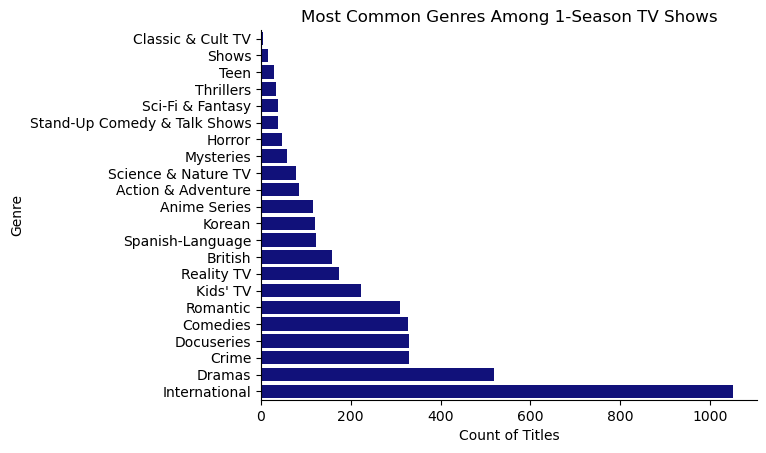

In [41]:
sns.barplot(data=most_popular_duration_show, x='title', y='genre_list', color='darkblue')
plt.title('Most Common Genres Among 1-Season TV Shows')
plt.xlabel('Count of Titles')
plt.ylabel('Genre')
sns.despine()
plt.show()

### Director Analysis

In [45]:
top_directors = df.groupby('director')['title'].count().reset_index().sort_values(by='title', ascending=False)[:11]
top_directors = top_directors.drop(top_directors.index[0])

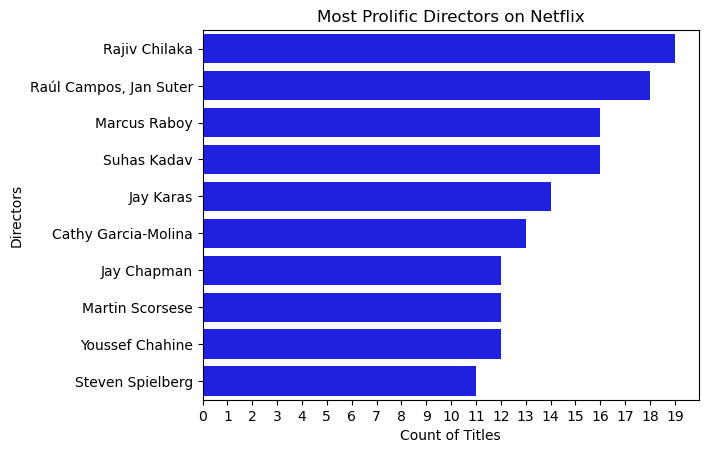

In [44]:
sns.barplot(data=top_directors, x='title', y='director', color='blue')
plt.xlabel('Count of Titles')
plt.ylabel('Directors')
plt.title('Most Prolific Directors on Netflix')
plt.xticks(range(0, 20))
plt.show()

### Month Added Analysis

In [52]:
monthly_add = df_date_expand.groupby(['month_added', 'type'])['title'].count().reset_index()
monthly_add = monthly_add.pivot(index='month_added', columns='type', values='title')
monthly_add = monthly_add[['TV Show', 'Movie']]
monthly_add = monthly_add.assign(total = monthly_add['TV Show'] + monthly_add['Movie']).sort_values(by='total', ascending=True)
monthly_add = monthly_add.drop(columns='total')

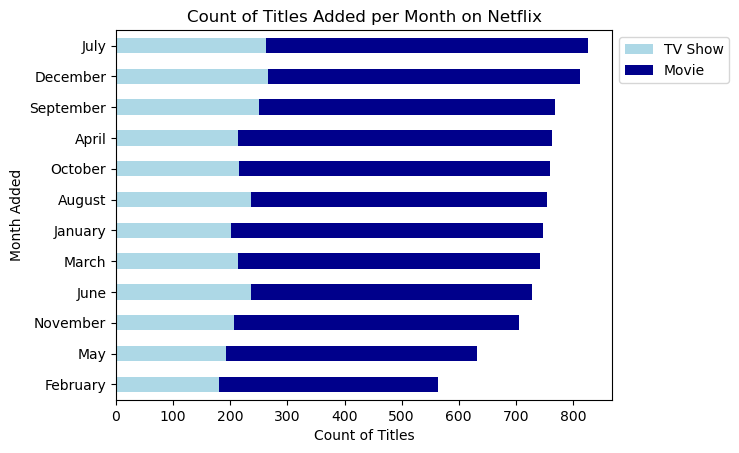

In [53]:
monthly_add.plot(kind='barh', stacked=True, color=type_palette)
plt.xlabel('Count of Titles')
plt.ylabel('Month Added')
plt.title('Count of Titles Added per Month on Netflix')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

## Key Insights

## Acknowledgment